Mean Absolute Error: 920392.9397607954
R-squared: 0.6463350878895878
                            Feature    Coefficient
0                              area  549164.541650
1                          bedrooms   59649.504400
2                         bathrooms  559614.480930
3                           stories  361644.239779
4                           parking  260916.619069
5                      mainroad_yes  142138.056651
6                     guestroom_yes  105458.533985
7                      basement_yes  230256.712272
8               hotwaterheating_yes  128949.744884
9               airconditioning_yes  318745.845855
10                     prefarea_yes  215853.034064
11  furnishingstatus_semi-furnished  -59972.424513
12     furnishingstatus_unfurnished -183457.576823


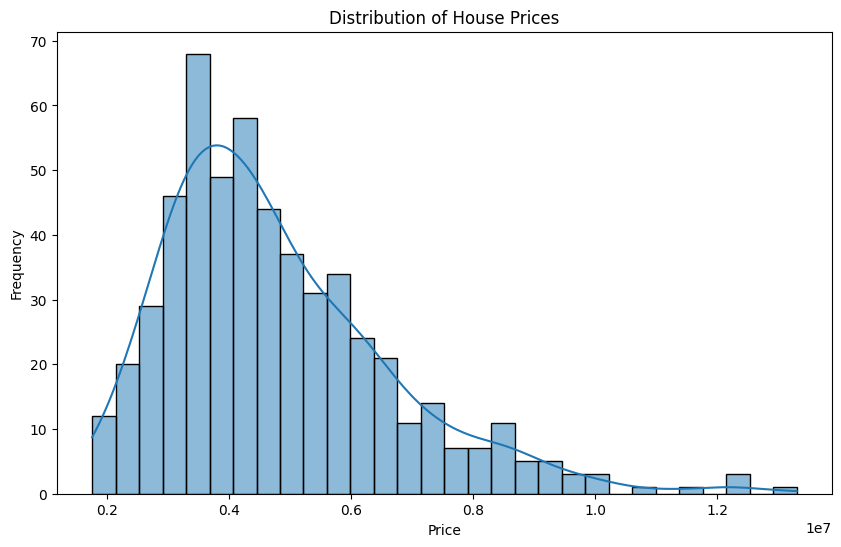

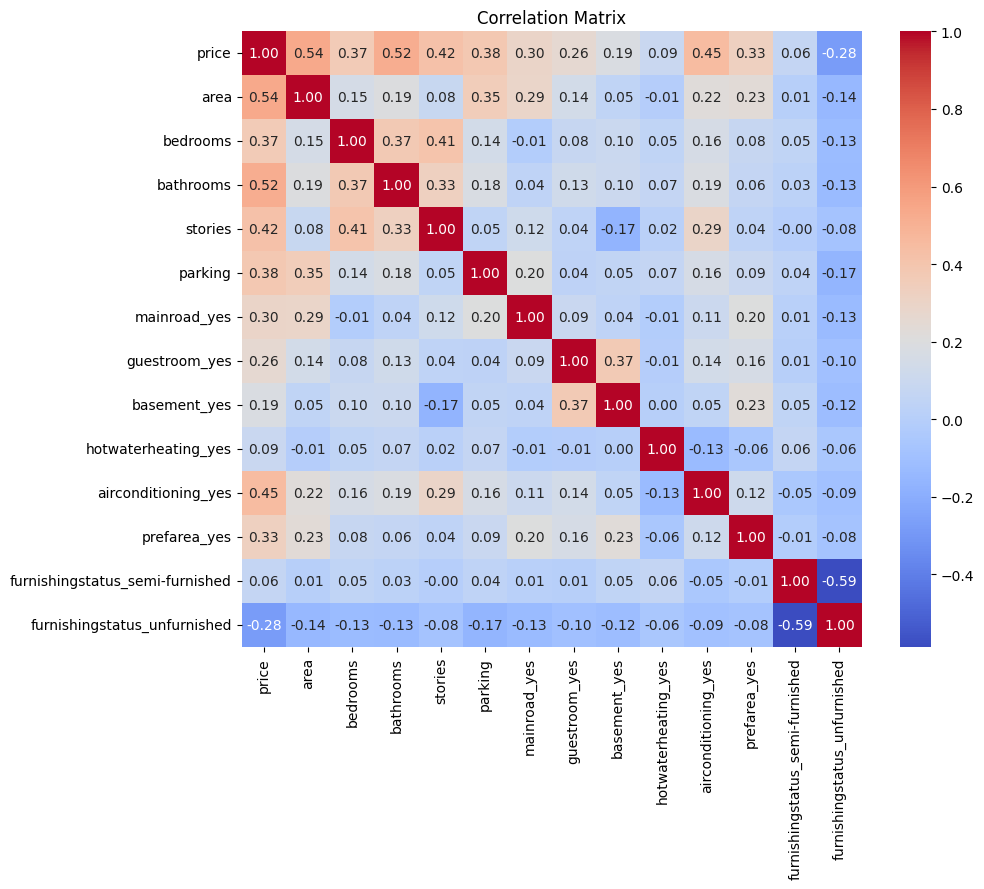

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'/content/Housing.csv'
df = pd.read_csv(file_path)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

coefficients = model.coef_
feature_names = X.columns

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coef_df)

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()